From the historical data on loans given out with information on whether or not the borrower defaulted, we can build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv('lending_club_info.csv', index_col=0)
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
def feature_info(feature_name):
    print(data_info.loc[feature_name]['Description'])
    

In [4]:
feature_info('mort_acc')

Number of mortgage accounts.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


## Data Visualization

<AxesSubplot:xlabel='loan_status', ylabel='count'>

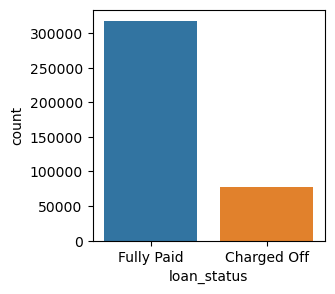

In [7]:
plt.figure(figsize=(3,3))
sns.countplot(x='loan_status',data=df)

/Users/sudiptarakshit/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

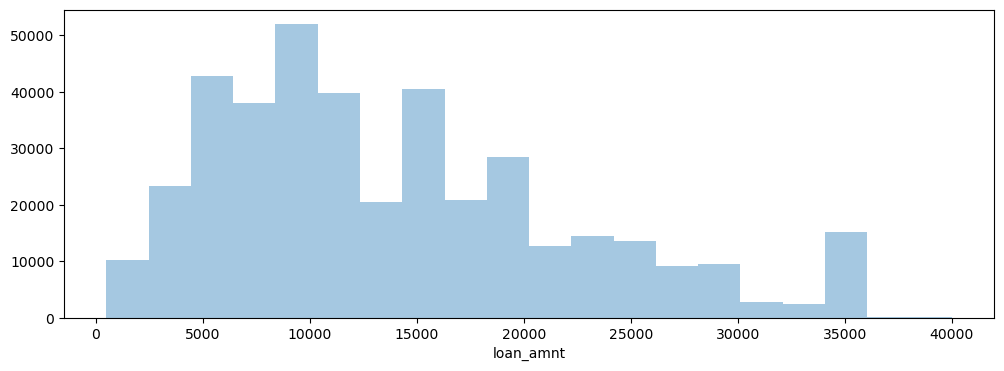

In [8]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=20)


<AxesSubplot:>

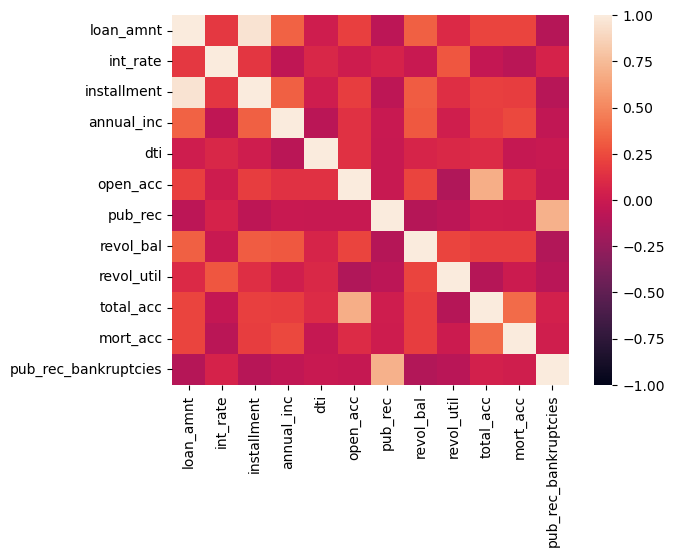

In [9]:
sns.heatmap(data=df.corr(),vmax=1,vmin=-1)


There is almost perfect correlation with the "installment" feature. We explore this feature further.

In [10]:
feature_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [11]:
feature_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

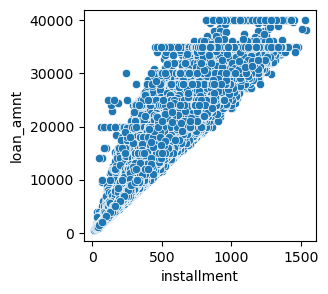

In [12]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

We create a boxplot showing the relationship between the loan_status and the Loan Amount.

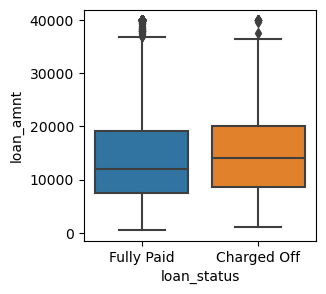

In [13]:
plt.figure(figsize=(3,3))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.show()

We calculate the summary statistics for the loan amount, grouped by the loan_status.

In [14]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. 

In [15]:
feature_info('grade')

LC assigned loan grade


In [16]:
feature_info('sub_grade')

LC assigned loan subgrade


In [17]:
sorted(df.grade.unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [18]:
sorted(df.sub_grade.unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

We create a countplot per grade and we set the hue to the loan_status label.

<AxesSubplot:xlabel='grade', ylabel='count'>

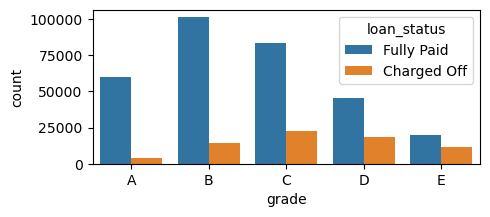

In [19]:
plt.figure(figsize=(5,2))
sns.countplot(x=df.grade,order=['A','B','C','D','E'],hue=df.loan_status)

We create count plot per subgrade.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

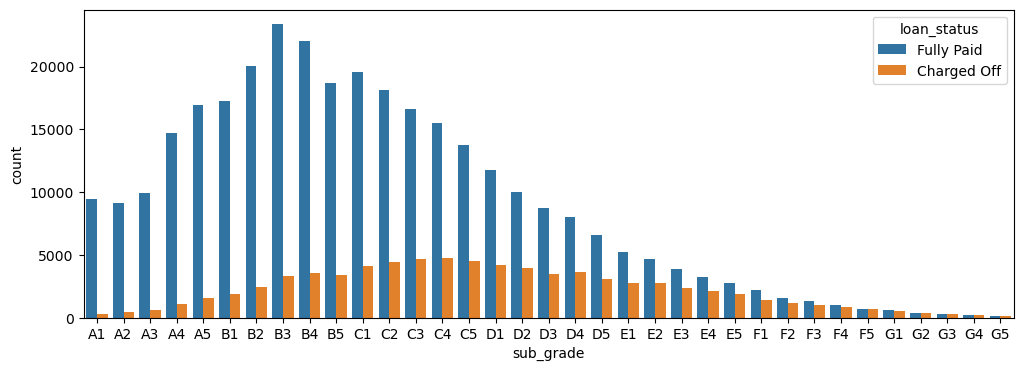

In [20]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df.sub_grade.unique())
sns.countplot(x=df.sub_grade,order=subgrade_order,hue=df.loan_status)

It looks like F and G subgrades don't get paid back that often. We isloate those and recreate the countplot just for those subgrades to look more closely.

In [21]:
f_and_g = df[(df['grade']=='F')|( df['grade']=='G')]

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

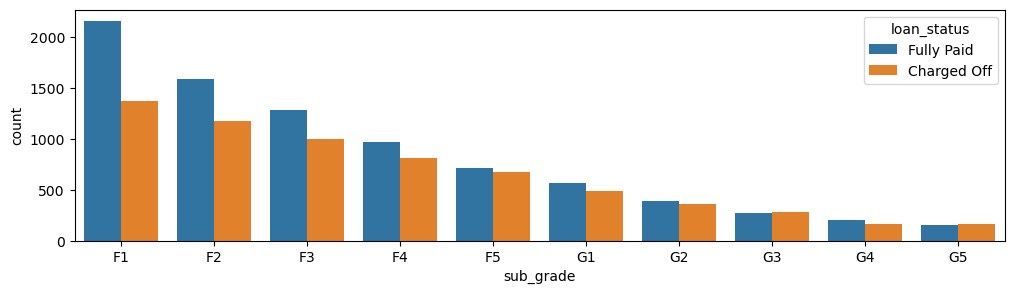

In [22]:
plt.figure(figsize=(12,3))
sns.countplot(x=f_and_g.sub_grade, order=sorted(f_and_g.sub_grade.unique()),hue=f_and_g.loan_status)

In [23]:
pd.get_dummies(data=df.loan_status,drop_first=True)
loan_repaid = pd.DataFrame(data=pd.get_dummies(data=df.loan_status,drop_first=True))

In [24]:
df['loan_repaid']= loan_repaid

In [25]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [26]:
#Alternate Way
#df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

We create a bar plot showing the correlation of the numeric features to the new loan_repaid column.

<AxesSubplot:>

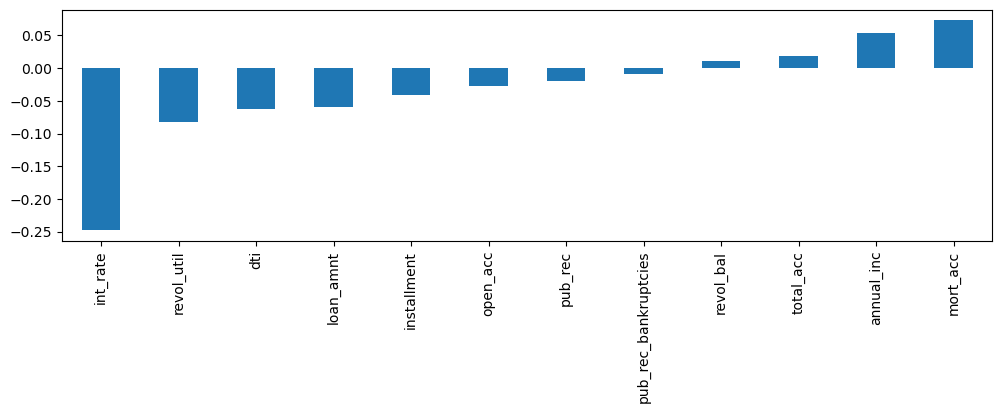

In [27]:
plt.figure(figsize=(12,3))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

## Data Preprocessing

1. Missing value handling
2. Remove unnecessary features
3. Convert categorical string features into dummy variables

### Missing value handling

In [28]:
# Total length of the dataframe
len(df)

396030

We display the total count of missing values per column.

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

We convert this series to be in term of percentage of the total dataFrame

In [30]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

<AxesSubplot:>

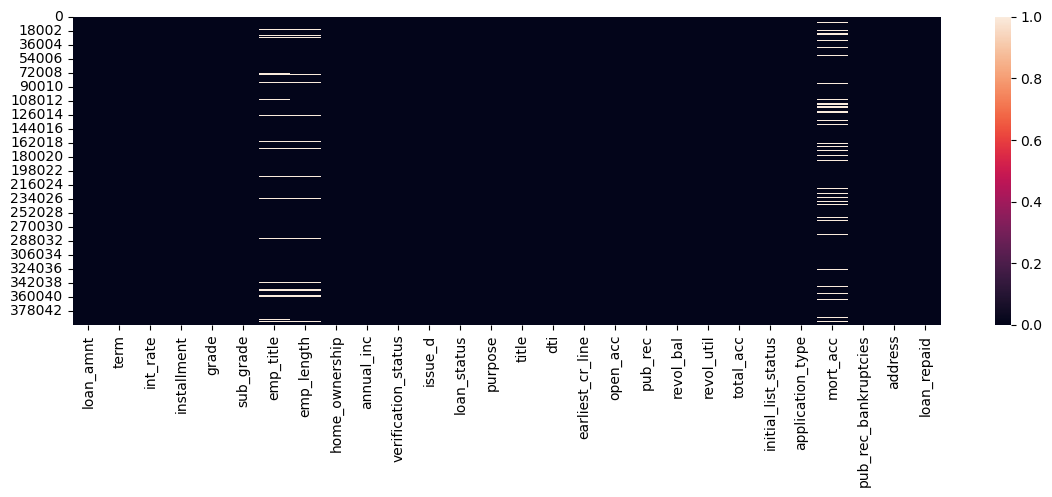

In [31]:
plt.figure(figsize=(14,4))
sns.heatmap(data=df.isnull())

Let's examine emp_title and emp_length to see whether it will be okay to drop them. 

In [32]:
feature_info('emp_title')
print('\n')
feature_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


We check how many unique employment job titles are available

In [33]:
df.emp_title.value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

There are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [34]:
df = df.drop(labels='emp_title',axis=1)

We create a count plot of the emp_length feature column.

In [35]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

We rearrange the above values to 

In [36]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

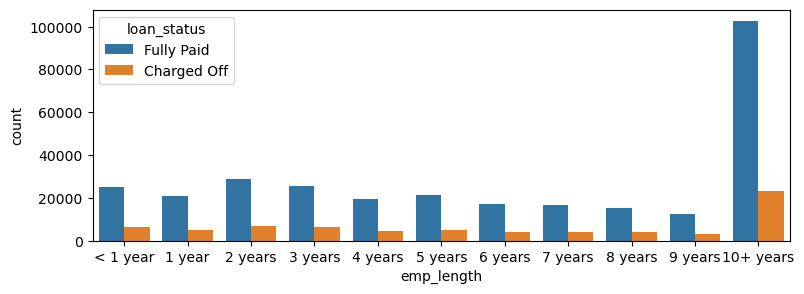

In [37]:
plt.figure(figsize=(9,3))
sns.countplot(x=df.emp_length,data=df,order=emp_length_order, hue=df.loan_status)

we want the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

In [38]:
emp_co = df[df['loan_status']== 'Charged Off'].groupby(by=df.emp_length).count()['loan_status']

In [39]:
emp_fp = df[df['loan_status']== 'Fully Paid'].groupby(by=df.emp_length).count()['loan_status']

In [40]:
emp_len_percent = emp_co/(emp_co+emp_fp)

<AxesSubplot:xlabel='emp_length'>

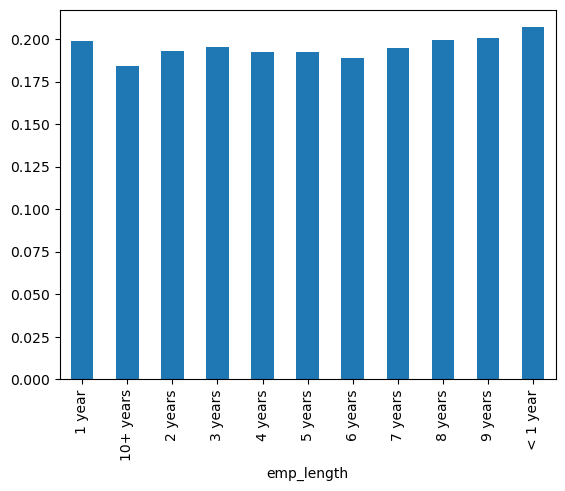

In [41]:
emp_len_percent.plot(kind = 'bar')

Charge off rates are extremely similar across all employment lengths. So, we drop the emp_length column.

In [42]:
df = df.drop(labels='emp_length', axis=1)

We revisit the dataframe to see what feature columns still have missing data.

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

We review the title column vs the purpose column.

In [44]:
df.purpose.head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [45]:
df.title.head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The 'title' column and 'purpose' column are same. We drop the 'title' column.

In [46]:
df = df.drop(labels='title', axis=1)

We have a lot of missing values in 'mort_acc' coulmn. We explore the column

In [47]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

There are many ways we could deal with this missing data. 
1. We could attempt to build a simple model to fill it in, such as a linear model.
2. We could just fill it in based on the mean of the other columns.
3. We could even bin the columns into categories and then set NaN as its own category.

In [48]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

It looks like the total_acc feature correlates with the mort_acc

In [49]:
feature_info('total_acc'), feature_info('mort_acc')

The total number of credit lines currently in the borrower's credit file
Number of mortgage accounts.


(None, None)

We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [50]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [51]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [52]:
total_acc_avg[2.0]

0.0

We build a function accepts the total_acc and mort_acc values for the row. It checks if the mort_acc is NaN , if so, it returns the avg mort_acc value for the corresponding total_acc value for that row.
    
total_acc_avg here should be a Series or dictionary containing the mapping of the groupby averages of mort_acc per total_acc values.

In [53]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [54]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [55]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

We see revol_util and the pub_rec_bankruptcies have missing data points, but they account for very less of the total data.

In [56]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical value treatment

In [57]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

We treat string features one by one

#### `term` feature

We convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map()

In [58]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [59]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

### `grade` feature

We know that `grade` is part of `subgrade`. So we can drop grade feature

In [60]:
df = df.drop('grade',axis=1)

We convert the subgrade into dummy variables.

In [61]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [62]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

In [63]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [64]:
#Check the remaining object columns
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

#### verification_status, application_type,initial_list_status,purpose

We convert these columns: ['verification_status','application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.

In [65]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

#### home_ownership

In [66]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then we concatenate them with the original dataframe. 

In [67]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

#### `address` feature

In [68]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [69]:
df['zip_code']= df['address'].apply(lambda address:address[-5:])

Now we make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.

In [70]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

#### `issue_d` feature

In [71]:
feature_info('issue_d')

The month which the loan was funded


We drop this feature.

In [72]:
df = df.drop(labels='issue_d', axis=1)

#### `earliest_cr_line`

In [73]:
feature_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


This appears to be a historical time stamp feature. We extract the year from this feature using a .apply function, then convert it to a numeric feature. 

In [74]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [75]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

### Train Test Split

In [76]:
from sklearn.model_selection import train_test_split

We drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [77]:
df = df.drop('loan_status',axis=1)

We set X and y variables to the .values of the features and label.

In [78]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

We perform a train/test split with test_size=0.2 and a random_state of 101.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Normalization of data

We use a MinMaxScaler to normalize the feature data X_train and X_test. 

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

In [82]:
X_train = scaler.fit_transform(X_train)

In [83]:
X_test = scaler.transform(X_test)

### Model Building

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

We need to know the number of features

In [87]:
X.shape

(395219, 78)

In [85]:
model = Sequential()

2022-10-13 01:02:12.736440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [88]:
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

We fit the model to the training data for 25 epochs. Also add in the validation data for later plotting. We also add in a batch_size of 256.

In [89]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2993 - val_loss: 0.2645
Epoch 2/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2656 - val_loss: 0.2628
Epoch 3/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2632 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2616 - val_loss: 0.2616
Epoch 5/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2607 - val_loss: 0.2625
Epoch 6/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2603 - val_loss: 0.2614
Epoch 7/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2599 - val_loss: 0.2616
Epoch 8/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2596 - val_loss: 0.2612
Epoch 9/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2593 - val_loss: 0.2610
Epoch 10/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.258

### Evaluating Model Performance

In [90]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

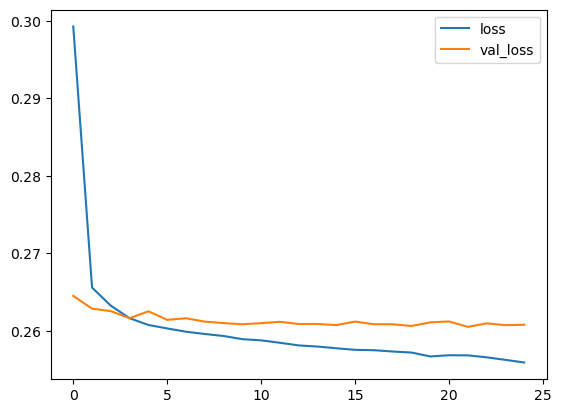

In [92]:
losses[['loss','val_loss']].plot()

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
predictions = model.predict(X_test)

2471/2471 [==============================] - 1s 367us/step


In [95]:
predictions

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [8.4841555e-01],
       [9.9999964e-01],
       [7.6034636e-20]], dtype=float32)

In [99]:
predictions[0][0]

1.0

In [101]:
prediction_class = []
for i in predictions:
    if i[0]>0.5:
        prediction_class.append(1)
    else:
        prediction_class.append(0)
         

In [103]:
print(classification_report(y_test,prediction_class))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [104]:
confusion_matrix(y_test,prediction_class)

array([[ 7100,  8558],
       [  306, 63080]])